In [1]:
#Magic Commands
%matplotlib inline

#dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
#file to load
city_data_to_load=os.path.join("Resources","city_data.csv")
ride_data_to_load=os.path.join("Resources","ride_data.csv")

In [3]:
#File to read
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#Inspecting City Data DF
# 1. Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# 2. Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# 3. Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [9]:
# Get the number of data points from the SubUrban cities.
sum(city_data_df["type"]=="Suburban")

36

In [10]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [11]:
# Inspectting the Ride data df
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
#Merging DataFrames
# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df,city_data_df, how="left", on=["city","city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# Create the Urban city DataFrame.
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]

In [16]:
# Get the number of rides for urban cities.
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
# Create the suburban and rural ride count.
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]

In [18]:
# Get average fare for each city in the urban cities.
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [19]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]

In [20]:
# Get the average number of drivers for each urban city.
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [21]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]

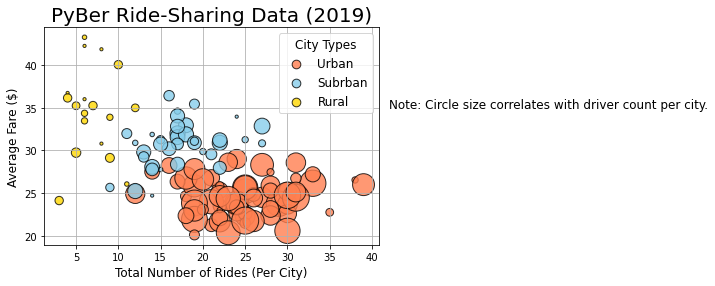

In [22]:
%matplotlib inline

# Build the scatter charts for each city type.
plt.scatter(urban_ride_count,
            urban_avg_fare,
           s=10*urban_driver_count,
           edgecolors="k",linewidths=1,
            color="coral", alpha=0.8, label="Urban")

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
           s=10*suburban_driver_count,
           edgecolors="k",linewidths=1,
            color="skyblue", alpha=0.8, label="Subrban")

# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
            rural_avg_fare,
           s=10*rural_driver_count,
           edgecolors="k",linewidths=1,
            color="gold", alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12", wrap='True')

#show the plot
plt.show()

In [23]:
# Save the figure.


In [24]:
#Summary Statistics for Number of Rides by City Type
# Import stats module from SciPy.
import scipy.stats as sts

In [25]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [26]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [27]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [28]:
#Summary Statistics for the Fare by City Type
# Get the fares for the urban cities.
urban_fares=urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [29]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares=np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares=np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares=sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [30]:
# Get the fares for the suburban cities.
suburban_fares=suburban_cities_df["fare"]

In [31]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares=np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares=np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares=sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [32]:
# Get the fares for the rural cities.
rural_fares=rural_cities_df["fare"]

In [33]:
mean_rural_fares=np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares=np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares=sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [34]:
#Summary Statistics for the Number of Drivers by City Type
# Get the driver count data from the all city types.
urban_drivers=urban_cities_df["driver_count"]

In [35]:
mean_urban_drivers=np.mean(urban_drivers)
print(f"The mean number of drivers for urban trips is {mean_urban_drivers:.0f}.")

median_urban_drivers=np.median(urban_drivers)
print(f"The median number of drivers for urban trips is {median_urban_drivers:.0f}.")

mode_urban_drivers=sts.mode(urban_drivers)
print(f"The mode number of driversfor urban trips is {mode_urban_drivers}.")

The mean number of drivers for urban trips is 37.
The median number of drivers for urban trips is 37.
The mode number of driversfor urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [36]:
suburban_drivers=suburban_cities_df["driver_count"]

In [37]:
mean_suburban_drivers=np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban trips is {mean_suburban_drivers:.0f}.")

median_suburban_drivers=np.median(suburban_drivers)
print(f"The median number of drivers for suburban trips is {median_suburban_drivers:.0f}.")

mode_suburban_drivers=sts.mode(suburban_drivers)
print(f"The mode number of driversfor suburban trips is {mode_suburban_drivers}.")

The mean number of drivers for suburban trips is 14.
The median number of drivers for suburban trips is 16.
The mode number of driversfor suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [38]:
rural_drivers=rural_cities_df["driver_count"]

In [39]:
mean_rural_drivers=np.mean(rural_drivers)
print(f"The mean number of drivers for rural trips is {mean_rural_drivers:.0f}.")

median_rural_drivers=np.median(rural_drivers)
print(f"The median number of drivers for rural trips is {median_rural_drivers:.0f}.")

mode_rural_drivers=sts.mode(rural_drivers)
print(f"The mode number of driversfor rural trips is {mode_rural_drivers}.")

The mean number of drivers for rural trips is 4.
The median number of drivers for rural trips is 4.
The mode number of driversfor rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


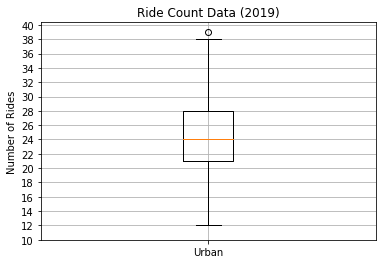

In [40]:
#Box-and-Whisker Plots for Ride Count Data
## Create a box-and-whisker plot for the urban cities ride count.
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()

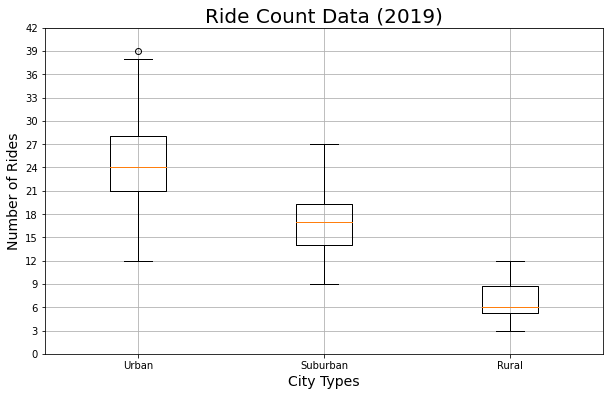

In [41]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels=["Urban", "Suburban", "Rural" ]
ride_count_data=[urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax=plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)

ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()



In [42]:
#find the outliners
## Get the city that matches 39.
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


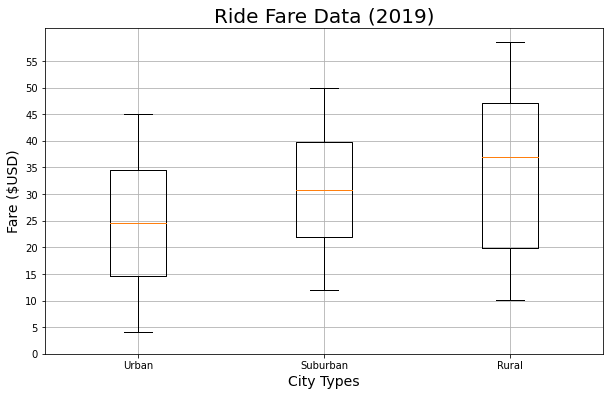

In [43]:
# Add all ride fare box-and-whisker plots to the same graph.
x_labels=["Urban","Suburban", "Rural"]

ride_fare_data=[urban_fares, suburban_fares, rural_fares]

fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data, labels=x_labels)

ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()


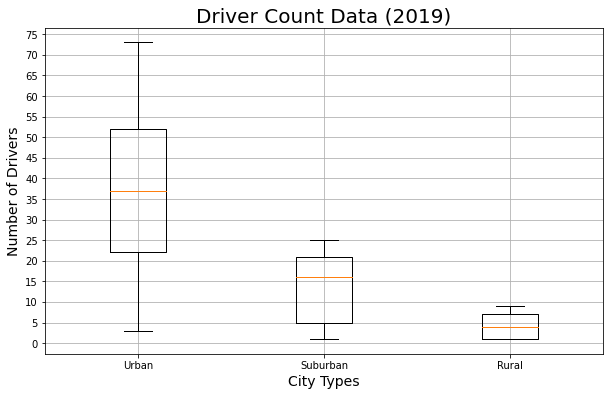

In [44]:
# Add all driver count data box-and-whisker plots to the same graph.
x_labels=["Urban","Suburban", "Rural"]

driver_data=[urban_drivers, suburban_drivers, rural_drivers]

fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(driver_data, labels=x_labels)

ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()



In [45]:
# Get the Percentage of Fares for Each City Type
type_fare_percents=pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum()*100
type_fare_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

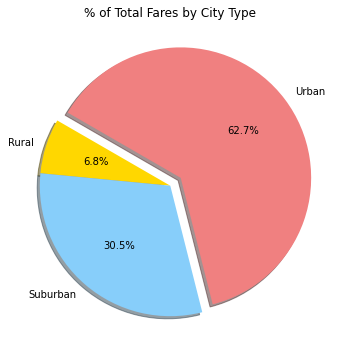

In [46]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

# Build the percentage of fares by city type pie chart.
plt.subplots(figsize=(10, 6))

plt.pie(type_fare_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

plt.show()

In [50]:
## Calculate Ride Percentages
# Calculate the percentage of rides for each city type.
ride_percents=100* pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

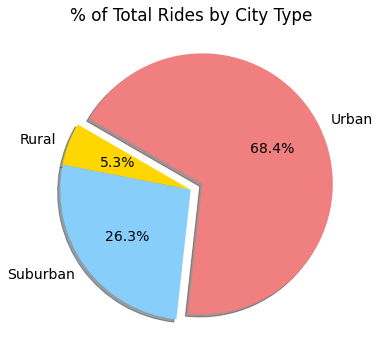

In [52]:
# Build the percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))

plt.pie(ride_percents,
       labels=["Rural","Suburban","Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")

# Show Figure
plt.show()


In [56]:
# Calculate the percentage of drivers for each city type.
driver_percents=100*city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

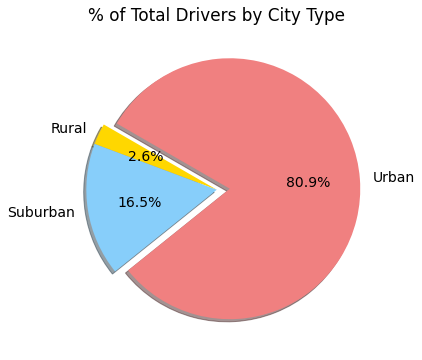

In [57]:
# Build the percentage of DRIVERS by city type pie chart.
plt.subplots(figsize=(10, 6))

plt.pie(driver_percents,
       labels=["Rural","Suburban","Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)

plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")

# Show Figure
plt.show()